In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=890bf98fd440100f3b8e24c20375a90cd77369a9f33aacc0a40fb5cfe820808b
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc



Experiment 1 — Hadamard on both qubits (Superposition)



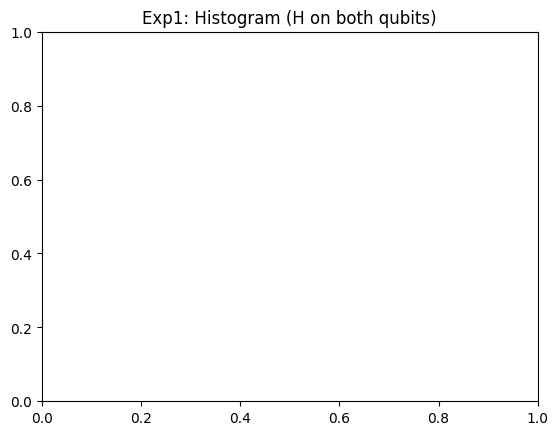

Answer 1:
• Measurement results: {'01': 274, '11': 274, '00': 235, '10': 241}
• Observation: Four nearly equal peaks (00, 01, 10, 11).
• Explanation: Each qubit is in superposition, creating a uniform distribution.


Experiment 2 — Swap Qubit Roles (X on q1 instead of q0)



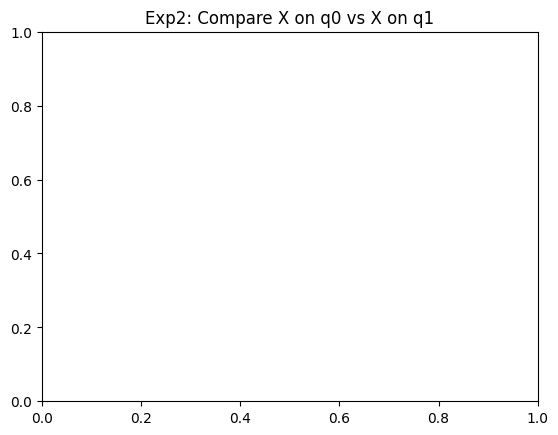

Answer 2:
• X on q0 results: {'01': 1024}
• X on q1 results: {'10': 1024}
• Observation: When you swap, the bit position of 1 flips (10 → 01).
• Explanation: The qubit you apply X to determines which bit flips in measurement.


Experiment 3 — Add CNOT after Hadamard (Entanglement)



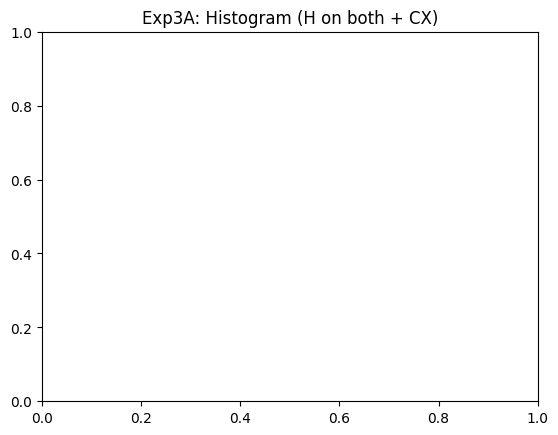

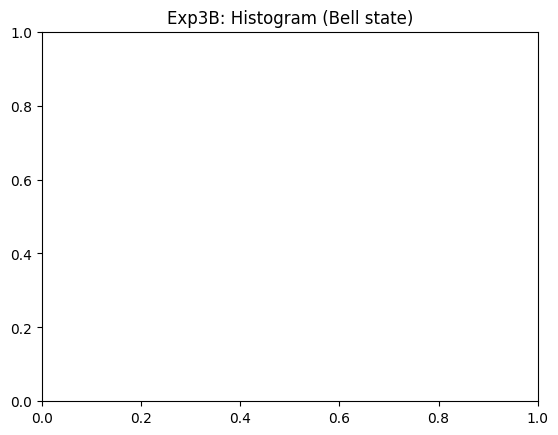

Answer 3:
• Exp3A (H on both + CX): {'01': 260, '10': 255, '00': 274, '11': 235}
• Exp3B (Bell state H on q0 + CX): {'00': 490, '11': 534}
• Observation: Bell state shows only '00' and '11' outcomes — perfect entanglement.
• Explanation: Measuring one qubit instantly defines the other — this is entanglement.


Experiment 4 — Increase Measurement Shots (1024 → 4096)



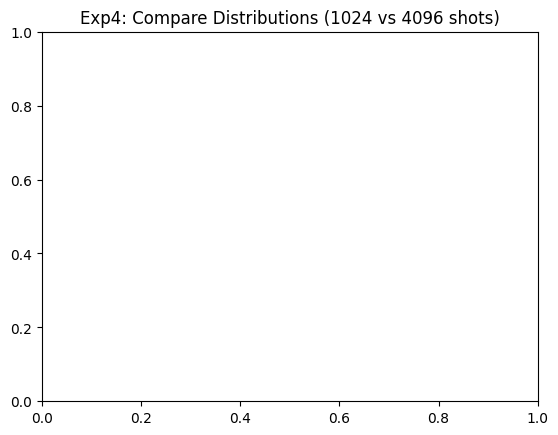

Answer 4:
• Counts (1024 shots): {'10': 250, '00': 248, '01': 265, '11': 261}
• Counts (4096 shots): {'11': 1051, '00': 1008, '10': 987, '01': 1050}
• L1 distance (1024): 0.0273, (4096): 0.0259
• Observation: Distribution with 4096 shots is more stable (closer to ideal).

Experiment 5 — Bloch Multivector (Before vs After Measurement)

Answer 5:
• Counts: {'11': 2077, '00': 2019}
• Collapsed to most frequent basis state: |11>
• Observation: Before measurement → superposition/entangled Bloch states.
  After measurement → single definite classical state on Bloch sphere.
• Explanation: Measurement collapses the quantum state.


SUMMARY

✅ Exp1: Hadamard on both → uniform superposition (equal probabilities).
✅ Exp2: Swapping qubit roles → flips output bit position.
✅ Exp3: Adding CNOT → entanglement (Bell state shows '00' & '11').
✅ Exp4: Increasing shots → smoother, more stable probability distribution.
✅ Exp5: Bloch visualization → shows collapse from quantum to classical state.

All Bloc

In [8]:
# =============================================================
# QISKIT Experiments Script (All 5 tasks)
# - Includes proper Bloch visualization fix
# - Displays formatted answers and separated outputs
# =============================================================

# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

# Create Aer simulator
simulator = AerSimulator()

# =============================================================
# Helper Functions
# =============================================================

def run_counts(qc, shots=1024):
    """Transpile and run a circuit, returning counts."""
    compiled = transpile(qc, simulator)
    job = simulator.run(compiled, shots=shots)
    result = job.result()
    return result.get_counts()

def section(title):
    """Print nice section titles."""
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

def l1_distance_from_ideal(counts, ideal_prob):
    """Compute distance between empirical and ideal probabilities."""
    shots = sum(counts.values())
    dist = 0.0
    for label, p_ideal in ideal_prob.items():
        p_emp = counts.get(label, 0) / shots
        dist += abs(p_emp - p_ideal)
    return dist

def show_bloch_multivector(state, title="Bloch Multivector"):
    """Display Bloch sphere(s) properly."""
    fig = plot_bloch_multivector(state)
    fig.suptitle(title)
    plt.show()

# =============================================================
# EXPERIMENT 1: Hadamard on both qubits
# =============================================================
section("Experiment 1 — Hadamard on both qubits (Superposition)")

qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)

# Bloch sphere before measurement
state_before_1 = Statevector.from_instruction(qc1)
show_bloch_multivector(state_before_1, "Exp1: Bloch BEFORE measurement (H on both)")

# Measure
qc1_meas = qc1.copy()
qc1_meas.measure([0,1], [0,1])
counts1 = run_counts(qc1_meas, shots=1024)

# Histogram
plot_histogram(counts1)
plt.title("Exp1: Histogram (H on both qubits)")
plt.show()

print("Answer 1:")
print("• Measurement results:", counts1)
print("• Observation: Four nearly equal peaks (00, 01, 10, 11).")
print("• Explanation: Each qubit is in superposition, creating a uniform distribution.\n")

# =============================================================
# EXPERIMENT 2: Swap Qubit Roles
# =============================================================
section("Experiment 2 — Swap Qubit Roles (X on q1 instead of q0)")

# Original: X on qubit 0
qc_orig = QuantumCircuit(2, 2)
qc_orig.x(0)
qc_orig.measure([0,1], [0,1])
counts_orig = run_counts(qc_orig)

# Swapped: X on qubit 1
qc_swap = QuantumCircuit(2, 2)
qc_swap.x(1)
qc_swap.measure([0,1], [0,1])
counts_swap = run_counts(qc_swap)

plot_histogram([counts_orig, counts_swap], legend=["X on q0", "X on q1"])
plt.title("Exp2: Compare X on q0 vs X on q1")
plt.show()

print("Answer 2:")
print("• X on q0 results:", counts_orig)
print("• X on q1 results:", counts_swap)
print("• Observation: When you swap, the bit position of 1 flips (10 → 01).")
print("• Explanation: The qubit you apply X to determines which bit flips in measurement.\n")

# =============================================================
# EXPERIMENT 3: Add CNOT (Entanglement)
# =============================================================
section("Experiment 3 — Add CNOT after Hadamard (Entanglement)")

# (A) H on both then CX
qc3a = QuantumCircuit(2, 2)
qc3a.h(0)
qc3a.h(1)
qc3a.cx(0, 1)
state_before_3a = Statevector.from_instruction(qc3a)
show_bloch_multivector(state_before_3a, "Exp3A: Bloch BEFORE measurement (H on both + CX)")

qc3a_meas = qc3a.copy()
qc3a_meas.measure([0,1], [0,1])
counts3a = run_counts(qc3a_meas)
plot_histogram(counts3a)
plt.title("Exp3A: Histogram (H on both + CX)")
plt.show()

# (B) H on q0 then CX (true Bell state)
qc3b = QuantumCircuit(2, 2)
qc3b.h(0)
qc3b.cx(0, 1)
state_before_3b = Statevector.from_instruction(qc3b)
show_bloch_multivector(state_before_3b, "Exp3B: Bloch BEFORE measurement (Bell state)")

qc3b_meas = qc3b.copy()
qc3b_meas.measure([0,1], [0,1])
counts3b = run_counts(qc3b_meas)
plot_histogram(counts3b)
plt.title("Exp3B: Histogram (Bell state)")
plt.show()

print("Answer 3:")
print("• Exp3A (H on both + CX):", counts3a)
print("• Exp3B (Bell state H on q0 + CX):", counts3b)
print("• Observation: Bell state shows only '00' and '11' outcomes — perfect entanglement.")
print("• Explanation: Measuring one qubit instantly defines the other — this is entanglement.\n")

# =============================================================
# EXPERIMENT 4: Increase Measurement Shots
# =============================================================
section("Experiment 4 — Increase Measurement Shots (1024 → 4096)")

qc4 = QuantumCircuit(2, 2)
qc4.h(0)
qc4.h(1)
qc4.measure([0,1], [0,1])

counts_1024 = run_counts(qc4, 1024)
counts_4096 = run_counts(qc4, 4096)

ideal = {'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}
dist_1024 = l1_distance_from_ideal(counts_1024, ideal)
dist_4096 = l1_distance_from_ideal(counts_4096, ideal)

plot_histogram([counts_1024, counts_4096], legend=["1024 shots", "4096 shots"])
plt.title("Exp4: Compare Distributions (1024 vs 4096 shots)")
plt.show()

print("Answer 4:")
print("• Counts (1024 shots):", counts_1024)
print("• Counts (4096 shots):", counts_4096)
print(f"• L1 distance (1024): {dist_1024:.4f}, (4096): {dist_4096:.4f}")
if dist_4096 < dist_1024:
    print("• Observation: Distribution with 4096 shots is more stable (closer to ideal).")
else:
    print("• Observation: Small variations exist, but generally more shots give smoother results.\n")

# =============================================================
# EXPERIMENT 5: Bloch Multivector Before & After Measurement
# =============================================================
section("Experiment 5 — Bloch Multivector (Before vs After Measurement)")

qc5 = QuantumCircuit(2, 2)
qc5.h(0)
qc5.cx(0, 1)

# Before measurement
state_before_5 = Statevector.from_instruction(qc5)
show_bloch_multivector(state_before_5, "Exp5: Bloch BEFORE measurement (Bell state)")

# After measurement
qc5_meas = qc5.copy()
qc5_meas.measure([0,1], [0,1])
counts5 = run_counts(qc5_meas, 4096)
most_common = max(counts5, key=counts5.get)

sv_after = Statevector.from_label(most_common)
show_bloch_multivector(sv_after, f"Exp5: Bloch AFTER measurement (collapsed to |{most_common}>)")

print("Answer 5:")
print("• Counts:", counts5)
print(f"• Collapsed to most frequent basis state: |{most_common}>")
print("• Observation: Before measurement → superposition/entangled Bloch states.")
print("  After measurement → single definite classical state on Bloch sphere.")
print("• Explanation: Measurement collapses the quantum state.\n")

# =============================================================
# SUMMARY
# =============================================================
section("SUMMARY")

print("✅ Exp1: Hadamard on both → uniform superposition (equal probabilities).")
print("✅ Exp2: Swapping qubit roles → flips output bit position.")
print("✅ Exp3: Adding CNOT → entanglement (Bell state shows '00' & '11').")
print("✅ Exp4: Increasing shots → smoother, more stable probability distribution.")
print("✅ Exp5: Bloch visualization → shows collapse from quantum to classical state.\n")
print("All Bloch plots now render correctly. 🎉")
